<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_003_study_essential/_001_eating/_001_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.DataFrame(data=None, columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])


data_list = [
    [1200, 1, 0, 0, 2, 'Skinny'],
    [2800, 1, 1, 1, 1, 'Normal'],
    [3500, 2, 2, 1, 0, 'Fat'],
    [1400, 0, 1, 0, 3, 'Skinny'],
    [5000, 2, 2, 2, 0, 'Fat'],
    [1300, 0, 0, 1, 2, 'Skinny'],
    [3000, 1, 0, 1, 1, 'Normal'],
    [4000, 2, 2, 2, 0, 'Fat'],
    [2600, 0, 2, 0, 0, 'Normal'],
    [3000, 1, 2, 1, 1, 'Fat']
]

for i in range(10):
    df.loc[i] = data_list[i]



# 현재 특성 시각화

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="darkgrid")


marker = {'Skinny': '*', 'Normal': '^', 'Fat': 'X'}

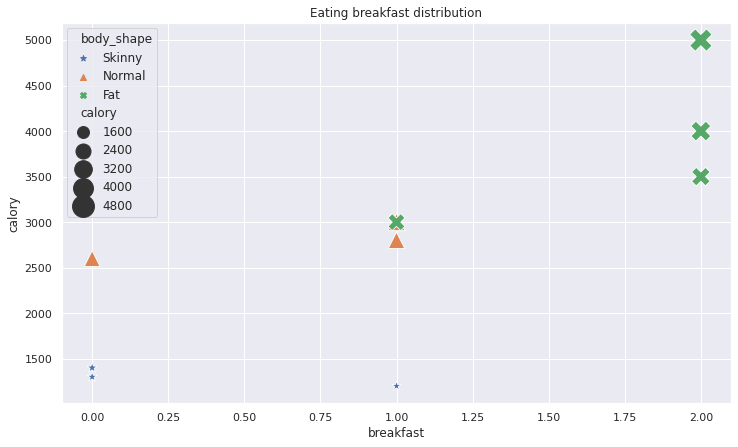

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.set_title("Eating breakfast distribution")
sns.scatterplot(data=df, x='breakfast', y='calory', hue='body_shape', style='body_shape', size='calory', sizes=(100, 500), markers=marker, ax=ax)

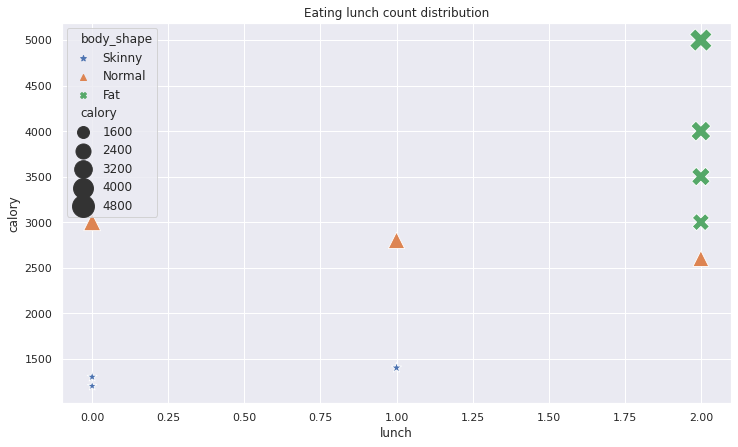

In [5]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_title("Eating lunch count distribution")
sns.scatterplot(data=df, x='lunch', y='calory', hue='body_shape', style="body_shape", size='calory', sizes=(100, 500), markers=marker, ax=ax)

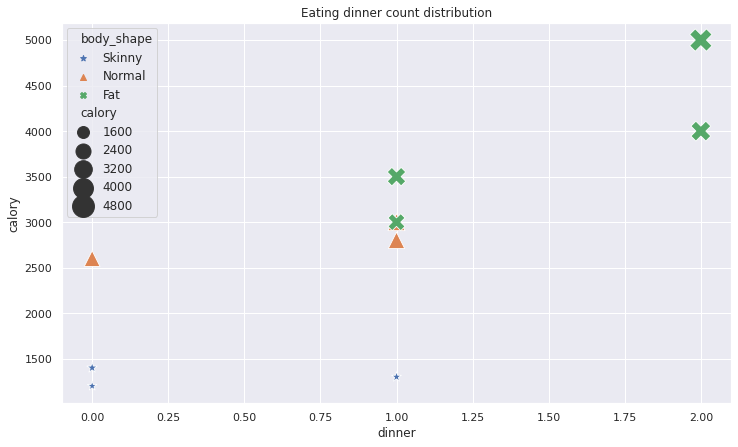

In [6]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_title("Eating dinner count distribution")
sns.scatterplot(data=df, x='dinner', y='calory', hue='body_shape', style="body_shape", size='calory', sizes=(100, 500), markers=marker, ax=ax)

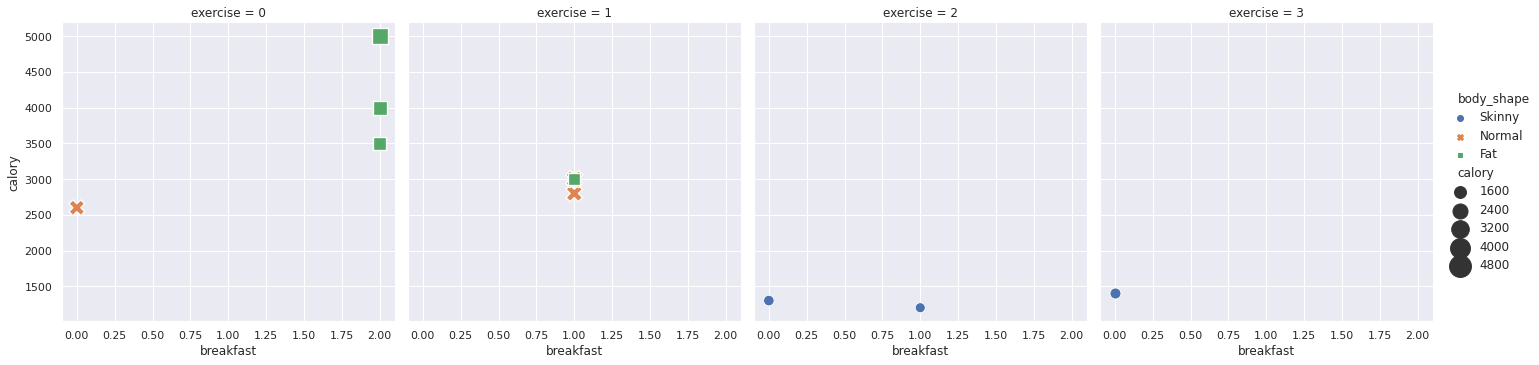

In [7]:
sns.relplot(data=df, x='breakfast', y='calory', 
            hue='body_shape', 
            style='body_shape', 
            kind='scatter',
            size='calory',
            sizes=(100, 500),
            col='exercise')

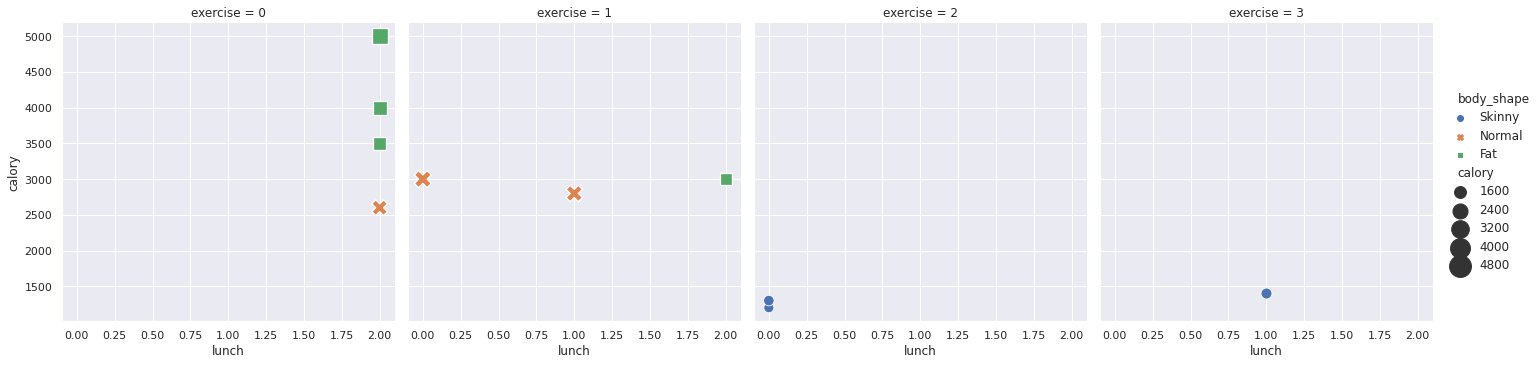

In [8]:
sns.relplot(data=df, x='lunch', y='calory', 
            hue='body_shape', 
            style='body_shape', 
            kind='scatter',
            size='calory',
            sizes=(100, 500),
            col='exercise')

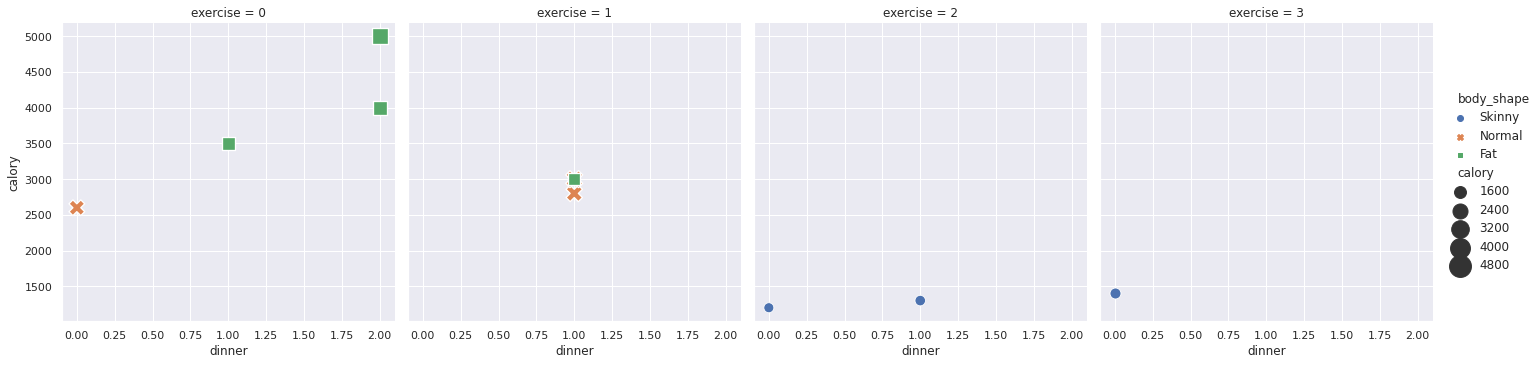

In [9]:
sns.relplot(data=df, x='dinner', y='calory', 
            hue='body_shape', 
            style='body_shape', 
            kind='scatter',
            size='calory',
            sizes=(100, 500),
            col='exercise')

# 독립 변수와 종속 변수 나누기

In [10]:
X = df.iloc[:, :-1]
Y = df[['body_shape']]

scaler = StandardScaler()
scaler.fit(X)
x_std = scaler.transform(X)
x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

# 직접 구현하는 covariance matrix

In [11]:
features = x_std.T
covariance_matrix = np.cov(features)

# 공분산 행렬 조회
print(covariance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


In [12]:
# 고윳값과 고유벡터 구하기
# 손실을 최소한으로 하는 1차원 공간으로 차원 축소

# 고윳값(eigen value), 고유벡터(eigen vector)
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

print('Eigen vectors \n%s' % eig_vecs)
print('-'*33)
print('Eigen values \n%s' % eig_vals)

Eigen vectors 
[[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]
---------------------------------
Eigen values 
[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


In [13]:
# 얼마만큼의 정보가 유지되는지 확인
print(eig_vals[0] / sum(eig_vals))

0.7318321731427544


# 사영시키기 - 반영시키기

In [14]:
projected_X = -x_std.dot(eig_vecs.T[0]) / np.linalg.norm(eig_vecs.T[0])

print(projected_X)

[-2.22600943 -0.0181432   1.76296611 -2.73542407  3.02711544 -2.14702579
 -0.37142473  2.59239883 -0.39347815  0.50902498]


# 1차원으로 축소한 결과의 특징 확인하기

In [15]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = .0
result['label'] = Y

In [16]:
result.head(2)

,PC1,y-axis,label
0,-2.226009,0.0,Skinny
1,-0.018143,0.0,Normal


In [17]:
result

,PC1,y-axis,label
0,-2.226009,0.0,Skinny
1,-0.018143,0.0,Normal
2,1.762966,0.0,Fat
3,-2.735424,0.0,Skinny
4,3.027115,0.0,Fat
5,-2.147026,0.0,Skinny
6,-0.371425,0.0,Normal
7,2.592399,0.0,Fat
8,-0.393478,0.0,Normal
9,0.509025,0.0,Fat


# 시각화

Text(0.5, 1.0, 'PCA result')

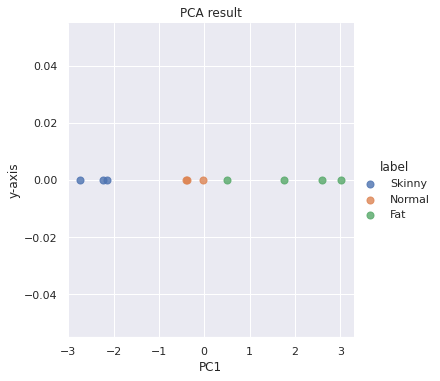

In [18]:
sns.lmplot('PC1' ,'y-axis', data=result,
           fit_reg=False,
           scatter_kws={'s': 50},
           hue='label')
plt.title('PCA result')

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca_std = pca.fit_transform(x_std)

In [20]:
pca_std

array([[-2.22600943],
       [-0.0181432 ],
       [ 1.76296611],
       [-2.73542407],
       [ 3.02711544],
       [-2.14702579],
       [-0.37142473],
       [ 2.59239883],
       [-0.39347815],
       [ 0.50902498]])

In [21]:
projected_X.reshape(-1, 1)

array([[-2.22600943],
       [-0.0181432 ],
       [ 1.76296611],
       [-2.73542407],
       [ 3.02711544],
       [-2.14702579],
       [-0.37142473],
       [ 2.59239883],
       [-0.39347815],
       [ 0.50902498]])

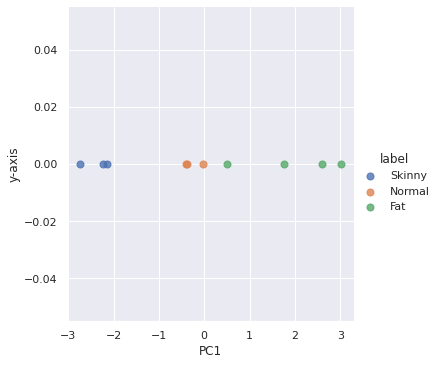

In [22]:
df_pca = pd.DataFrame(pca_std, columns=['PC1'])
df_pca['y-axis'] = 0.
df_pca['label'] = Y

sns.lmplot('PC1', 'y-axis', data=df_pca, fit_reg=False, scatter_kws={'s': 50},
           hue='label')

# build machine

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, activations, optimizers, losses, utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import numpy as np
import pandas as pd

seed_value = 7

np.random.seed = seed_value
tf.random.set_seed(seed_value)

In [24]:
label_encode_map = {
    'Skinny': 0,
    'Normal': 1,
    'Fat': 2
}
df_pca['label'] = df_pca['label'].map(label_encode_map)
df_pca.head(1)

,PC1,y-axis,label
0,-2.226009,0.0,0


In [25]:
model = models.Sequential([
                           layers.Input(shape=(1)),
                          #  layers.Dropout(.3),
                           layers.Dense(units=3, activation='relu'),
                           layers.Dense(3, 'softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

# train model

In [26]:
model.fit(df_pca.iloc[:, 0], df_pca.iloc[:, 2], 
          epochs=3,
          batch_size=64,
          verbose=True)

Epoch 1/3
1/1 [==============================] - 0s 392ms/step - loss: 0.6938 - accuracy: 0.7000
Epoch 2/3
1/1 [==============================] - 0s 6ms/step - loss: 0.6924 - accuracy: 0.7000
Epoch 3/3
1/1 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.7000


In [27]:
df_pred = pd.DataFrame(data=None, columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])
df_pred.loc[0] = [13000, 7, 5, 2, 1, 'Fat']
df_pred.loc[1] = [3300, 0, 1, 1, 1, 'Normal']
df_pred.loc[2] = [11000, 1, 1, 2, 0, 'Fat']
df_pred.loc[3] = [4100, 0, 1, 1, 2, 'Normal']
df_pred.loc[4] = [1300, 0, 0, 0, 3, 'Skinny']

In [28]:
x_test = df_pred.iloc[:, :-1]
y_test = df_pred['body_shape'].map(label_encode_map)

In [29]:
test_std_data = scaler.transform(x_test)

test_pca_std = pca.fit_transform(test_std_data)

In [30]:
model.evaluate(test_pca_std, y_test)

1/1 [==============================] - 0s 134ms/step - loss: 0.4910 - accuracy: 0.8000


[0.4910152852535248, 0.800000011920929]